In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import os
from tqdm import tqdm_notebook

In [2]:
PATH = '../../data/dogfacenet/aligned/'
SIZE = (104,104,3)
BEFO = PATH + 'before_2/'
AFTE = PATH + 'after_2/'
LABE = PATH + 'labels/reformated_3177.csv'


In [3]:
df = pd.read_csv(LABE)

In [4]:
del df['Unnamed: 0']

In [5]:
filenames = df['filename']
col = df.columns
coord = np.array([[df[col[i]][j] for i in range(1,len(col))] for j in range(len(df))])

508


([], <a list of 0 Text yticklabel objects>)

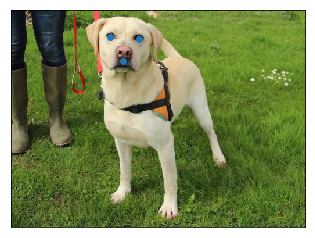

In [9]:
# Test
im = plt.imread(BEFO+df['filename'][200])
print(len(im[0]))
plt.imshow(im)
plt.plot(coord[200][0::2],coord[200][1::2],'o')
plt.xticks([])
plt.yticks([])

In [7]:
def solve(coord):
    A = np.array([
        [coord[0],-coord[1],1,0],
        [coord[1],coord[0],0,1],
        [coord[2],-coord[3],1,0],
        [coord[3],coord[2],0,1],
    ])
    h,w,c = SIZE
    b = [0.7*h/2.4,0.7*w/2.4,1.7*h/2.4,0.7*w/2.4]
    sol = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(b))
    return np.array([[sol[0], -sol[1], sol[2]],[sol[1], sol[0], sol[3]], [0,0,1]])

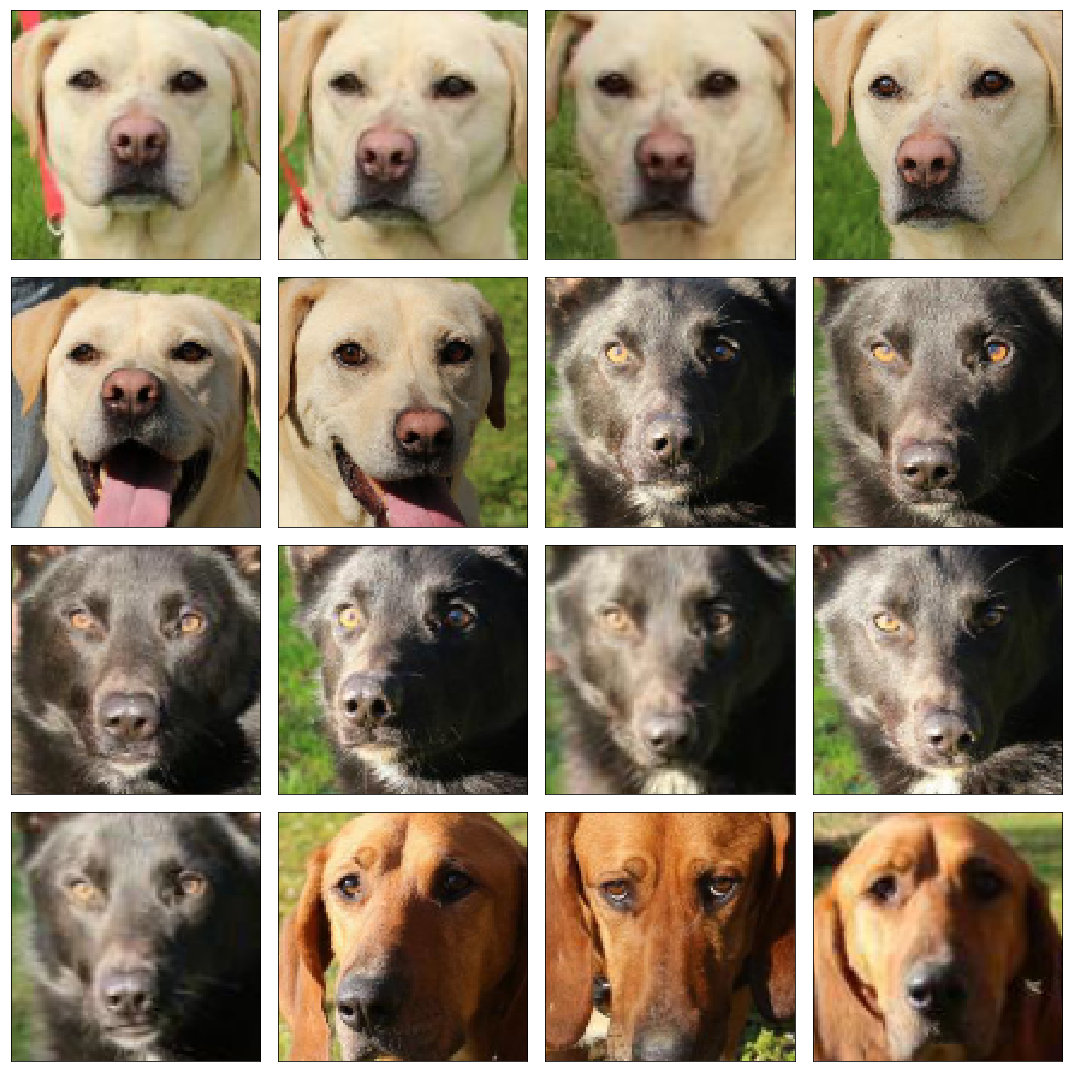

In [21]:
# Test
off = 200
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = sk.io.imread(BEFO+df['filename'][i+off])
    sk.io.imshow(image)
    M = solve(coord[i+off])
    test = sk.transform.warp(image, np.linalg.inv(M))
    h,w,c = SIZE
    test = test[:h,:w]
    sk.io.imshow(test)

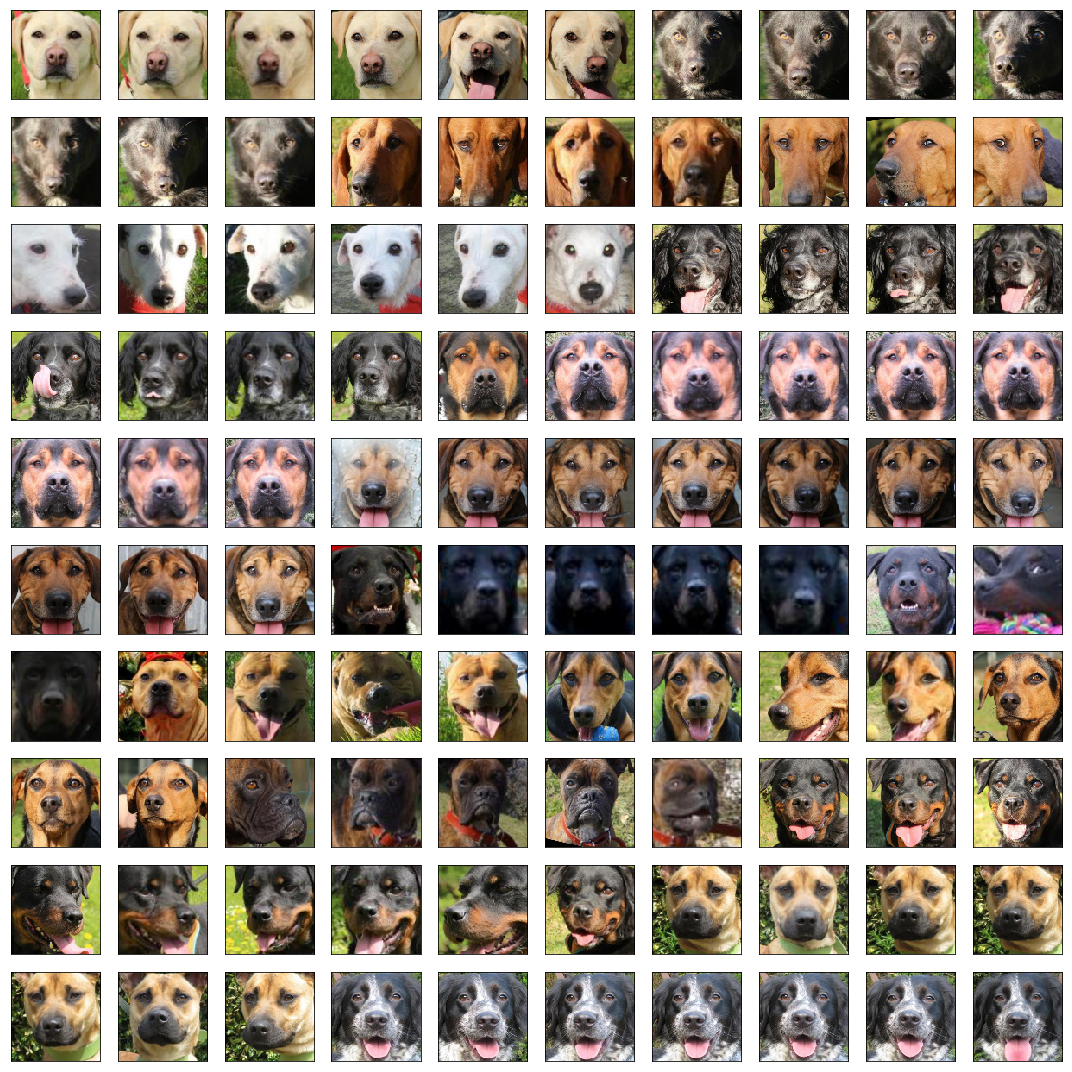

In [22]:
# Test
off = 200
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = sk.io.imread(BEFO+df['filename'][i+off])
    sk.io.imshow(image)
    M = solve(coord[i+off])
    test = sk.transform.warp(image, np.linalg.inv(M))
    h,w,c = SIZE
    test = test[:h,:w]
    sk.io.imshow(test)

In [8]:
for i in tqdm_notebook(range(0,len(df))):
    image = sk.io.imread(BEFO+df['filename'][i])
    if len(image.shape)==3:
        image = image[:,:,:3]
        M = solve(coord[i])
        test = sk.transform.warp(image, np.linalg.inv(M))
        h,w,c = SIZE
        test = test[:h,:w]

        # Create folder and save image
        filename = df['filename'][i]
        idx = 0
        while filename[idx]!='.':
            idx += 1
        foldername = filename[:idx]
        if not foldername in os.listdir(AFTE):
            os.mkdir(AFTE+foldername)

        sk.io.imsave(AFTE+foldername+'/'+filename[idx+1:],test)

HBox(children=(IntProgress(value=0, max=677), HTML(value='')))

c:\users\guillaume\anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
